In [12]:
import streamlit as st
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from streamlit.components.v1 import html

from visualize import *
from ray_utilities import *
from raytracing_v import *

In [2]:
spectral_resolution = 1
start_wl = 540
end_wl = 660
m = 1
span = end_wl-start_wl



In [3]:
blaze_wavelength = (start_wl+end_wl)/2
N = blaze_wavelength/spectral_resolution


In [4]:
blaze_wavelength, N

(600.0, 600.0)

In [5]:
N = 1200
d = 1/N
blaze_angle = np.arcsin((m*blaze_wavelength*(10**-9))/(2*d*(10**-3)))*180/np.pi
blaze_angle

21.10019602409302

In [6]:
blaze_angle = 30
incident_angle = np.arccos((blaze_wavelength*(1e-6)*m*N)/(2*np.sin(blaze_angle*np.pi/180)))*180/np.pi+blaze_angle
incident_angle

73.94551956230883

In [7]:
beta_min = np.arcsin(m*start_wl*(1e-6)*N-np.sin(incident_angle*np.pi/180))*180/np.pi

In [8]:
beta_max = np.arcsin(m*end_wl*(1e-6)*N-np.sin(incident_angle*np.pi/180))*180/np.pi

In [9]:
beta_min, beta_max

(-18.240067572531693, -9.729633680106284)

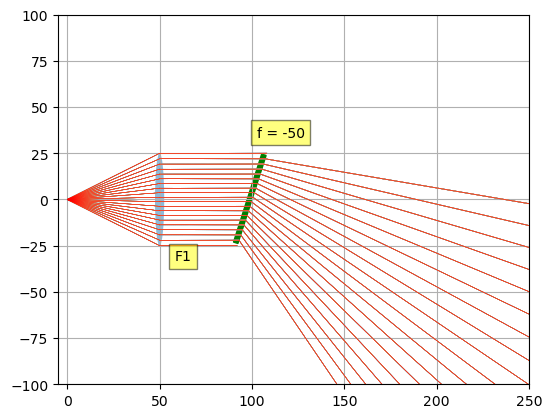

In [17]:
f1 = 50              # Focal length of f1 lens
f2 = 50              # Focal length of f2 lens
lens_aperture = 50 
grating_aperture = 50
npoints = 2         # Number of light source points
nrays = 20           # Number of light rays per point
ymax = -0.1         # Limit of source plane. Controls spectral resolution
ymin = 0.1
ngroves = N       # Grove density of diffraction grating
sensor_width = 12

# Simulate system for these wavelengths
lmb = list(np.linspace(400, 600, 10)*1e-9)

components = []
rays = []
image_plane = -200
# nrays = 20

# Create three scene points
scene = np.zeros((2, npoints))
scene[1, :] = np.linspace(ymin, ymax, npoints)

# Place a collimation lens
components.append(Lens(f=f1,
                            aperture=lens_aperture,
                            pos=[f1, 0],
                            theta=0,
                            name='F1'))

components.append(SphericalMirror(f=-50,aperture=50,pos=[2*f1,0], theta=60))


# Get the initial rays
[rays, ptdict, colors] = initial_rays(scene,
                                                    components[0],
                                                    nrays)
# Create rainbow colors
colors = get_colors(len(lmb), nrays*npoints, cmap='rainbow')

# Create a new canvas
canvas = Canvas([-5, 5*grating_aperture], [-f1*2, f1*2])

# Draw the components
canvas.draw_components(components)

# Draw the rays for each wavelength
for idx in range(len(lmb)):
    canvas.draw_rays(propagate_rays(components, rays,
                                        lmb=lmb[idx]), colors[idx],
                    linewidth=0.2)

# Show the system
canvas.show()
